# Exercise 10 - Data frames and Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data preparation
![Workflow](workflow_ComparingSample.svg)
## 1.1 Load data into frames

In [3]:
pheno = pd.read_csv('phenoTable.csv')
geno  = pd.read_csv('genoTable.csv')

## 1.2 [Merge data frames](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [6]:
df = pd.merge(pheno,geno)
df.head()

,BMD,MECHANICS_STIFFNESS,CORT_DTO__C_TH,CORT_DTO__C_TH_SD,CORT_MOM__J,CT_TH_RAD,CT_TH_RAD_STD,CANAL_VOLUME,CANAL_COUNT,CANAL_DENSITY,...,D18Mit64,D18Mit147,D18Mit123,D18Mit9,D18Mit4,D19Mit68,D19Mit40,D19MIT88,D19MIT17,D19MIT108
0,0.030221,57.163181,0.186455,0.019785,0.103288,78.558303,17.440679,18351.469264,31.0,72.458800,...,H,H,H,H,H,H,H,H,H,H
1,0.032788,54.972011,0.183007,0.015696,0.126947,88.691516,22.238608,27002.217716,137.0,206.113056,...,B,H,B,B,H,B,B,B,-,H
2,0.036075,73.590881,0.216930,0.028019,0.171012,79.973567,8.862339,18464.688139,128.0,177.921019,...,B,H,H,A,A,H,H,H,H,B
3,0.031145,49.854823,0.193758,0.024087,0.099639,88.215056,23.288367,42840.614369,147.0,247.019809,...,-,A,H,B,B,B,B,B,B,B
4,0.034226,66.578296,0.175598,0.018144,0.176490,79.330125,15.968669,25474.883270,271.0,349.344731,...,B,-,B,B,H,H,H,H,H,B


# 2. Tasks
![Workflow](workflow_StatisticalSignificanceHunter.svg)
## 2.1 Running basic statistical analysis
For this example we will start with a fairly complicated dataset from a genetics analysis done at the Institute of Biomechanics, ETHZ.

### 2.2.1. Introduction
There are 1000 mouse femur bones which have been measured at high resolution and a number of shape analyses run on each sample. - Phenotypical Information - Each column represents a metric which was assessed in the images - CORT_DTO__C_TH for example is the mean thickness of the cortical bone.

In [4]:
pheno.head(5)

,BMD,MECHANICS_STIFFNESS,CORT_DTO__C_TH,CORT_DTO__C_TH_SD,CORT_MOM__J,CT_TH_RAD,CT_TH_RAD_STD,CANAL_VOLUME,CANAL_COUNT,CANAL_DENSITY,...,CANAL_THETA,CANAL_THETA_CV,CANAL_PCA1,CANAL_PCA1_CV,CANAL_PCA2,CANAL_PCA2_CV,CANAL_PCA3,CANAL_PCA3_CV,FEMALE,ID
0,0.030221,57.163181,0.186455,0.019785,0.103288,78.558303,17.440679,18351.469264,31.0,72.458800,...,59.576428,0.281042,443.537228,1.326217,120.150958,1.677884,30.294477,0.700402,0,351
1,0.032788,54.972011,0.183007,0.015696,0.126947,88.691516,22.238608,27002.217716,137.0,206.113056,...,54.487601,0.401896,293.627859,1.272190,84.416139,1.541258,34.940901,0.804821,0,356
2,0.036075,73.590881,0.216930,0.028019,0.171012,79.973567,8.862339,18464.688139,128.0,177.921019,...,56.120693,0.356876,326.470697,1.155693,87.714578,1.051160,32.911487,0.754326,0,357
3,0.031145,49.854823,0.193758,0.024087,0.099639,88.215056,23.288367,42840.614369,147.0,247.019809,...,50.206993,0.445938,243.130372,1.014527,81.448541,1.162161,37.690527,0.944862,0,359
4,0.034226,66.578296,0.175598,0.018144,0.176490,79.330125,15.968669,25474.883270,271.0,349.344731,...,53.561597,0.441762,243.212520,1.041145,80.598173,1.394151,39.716728,1.075045,1,360


Genetic Information (genoTable.csv)
Each animal has been tagged at a number of different regions of the genome (called markers: D1Mit236)
- At each marker there are 3 (actually 4) possibilities
- A is homozygous (the same from both parents) from the A strain
- B is homozygous from the B strain
- H is heterozygous (one from A, one from B)
- ‘-’ is missing or erronous measurements

In [5]:
geno.head(5)

,ID,D1Mit64,D1Mit236,D1Mit7,D1Mit386,D1Mit14,D1Mit540,D1Mit17,D2Mit365,D2Mit323,...,D18Mit64,D18Mit147,D18Mit123,D18Mit9,D18Mit4,D19Mit68,D19Mit40,D19MIT88,D19MIT17,D19MIT108
0,351,H,H,H,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H
1,353,B,B,B,B,H,H,H,H,A,...,H,A,A,A,H,H,H,H,H,H
2,354,H,A,A,A,A,H,H,H,H,...,H,-,H,H,A,H,H,A,H,H
3,355,A,A,H,H,-,H,H,A,A,...,H,H,A,A,A,A,A,-,A,A
4,356,H,A,A,A,A,A,H,H,-,...,B,H,B,B,H,B,B,B,-,H


### 2.1.2 Tasks
1. Look at the histograms of the available variables in the phenotype data.

/Users/kaestner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


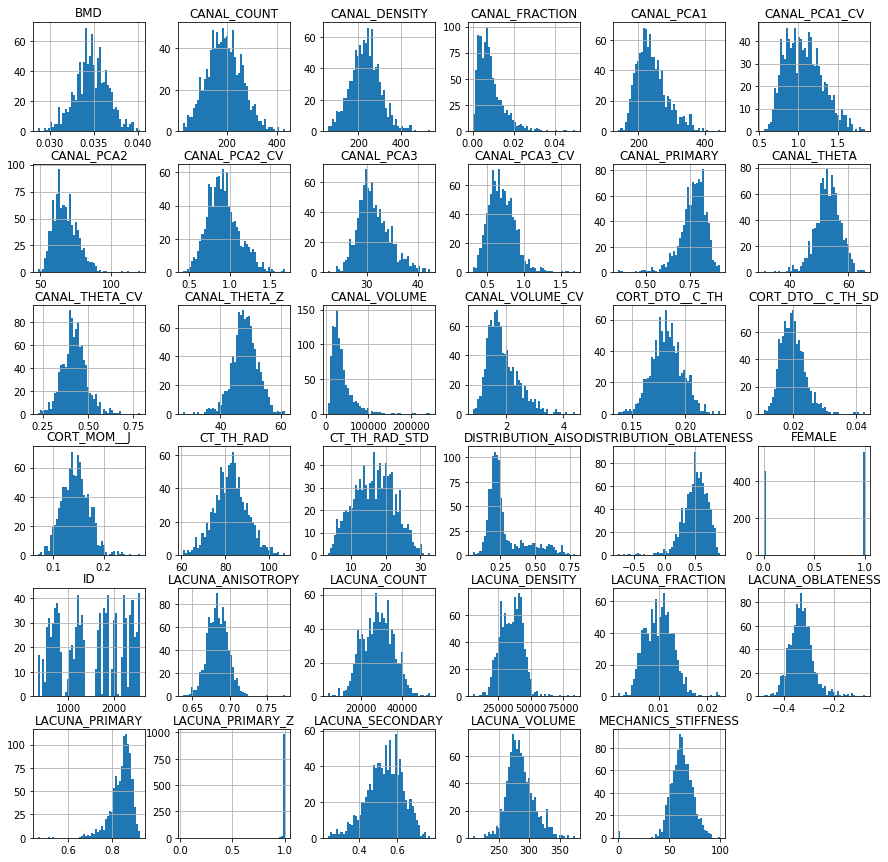

In [7]:
fig,ax=plt.subplots(1,1,figsize=(15,15));
pheno.hist(ax=ax,bins=50);

These are far too many variables to work with. At least for a start. We have to focus on some few e.g.
- Bone mineral desnity (BMD)
- Cortical bone thickness (CORT_DTO_TH)
- Cortical bone Microstructural thickness (CORT_DTO_TH_SD)

### 2.1.2.2 Look at the pair plot
Explore the data and correlations between various metrics by using the ‘pairplot’ plotting component. Examine different variable combinations.

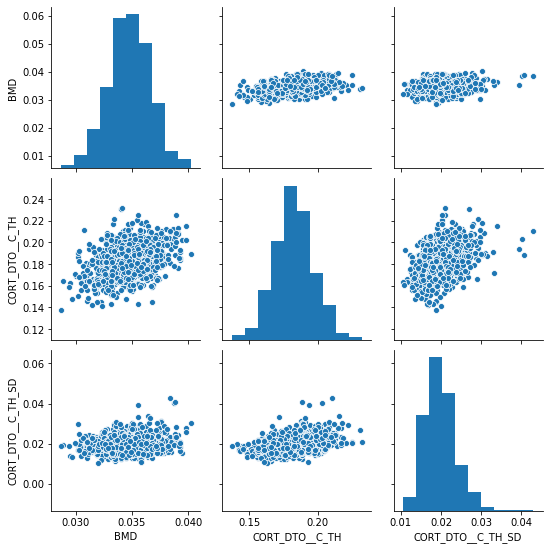

In [7]:
sns.pairplot(pheno, vars = ['BMD', 'CORT_DTO__C_TH', 'CORT_DTO__C_TH_SD'])

3. For the rest of the analysis you can connect the various components to the ‘Column Filter’ node since that is the last step in the processing
4. Use one of the T-Test nodes in the Statistics -> Hypothesis Testing section to see if there is a statistically significant difference between Gender’s when examining Cortical Bone Microstructural Thickness (Mean)
    - Which value is the p-value?
    - What does the p-value mean, is it significant, by what criterion?
5. Use another node from the Hypothesis Testing section to evaluate the effect on the D16Mit5 on the Lacuna Distribution Anisotropy? Is it significant?

## 2.1.3. Questions
1. In the ‘Independent Groups T-Test’ node we can run a t-test against all of the columns at the same time, why SHOULDN’T we do this?
2. If we do, how do we need to interpret this in the results
3. Is p<0.05 a sufficient signifance criteria?

## 2.2 Comparing two real bone samples
For this example we will compare two real cortical bone samples taken from mice. The data will be downloaded in KNIME from the course website (KNIME can also download / upload to FTP servers making sharing results and data easier). - If you are using your own computer you will need to change the Target Folder in both of the “Download” nodes to something reasonable (just click Browse)

For the purpose of the analysis and keeping the data sizes small, we will use Kevin’s Crazy Camera again for simulating the noisy detection process. The assignment aims to be more integrative and you will combine a number of different lectures to get to the final answer.


![Workflow](workflow_TwoSampleOneCamera.svg)


### 2.2.1 Questions
1. We want to know if there is a statistically significant difference in
    - cell volume
    - cell shape
    - cell density
    - between the two samples given the variation in the detector
    - which metric do we need here? why?
2. We see in the volume comparison a very skewed representation of the data Volume/Num Pixels
    - why is this? (Hint check the segmented images)
    - What might be done to alleviate it (hint Row Filter)

### 2.2.2 Hints
1. Look at the kind of noise (you can peek inside the Crappy Camera) to choose the proper filter
2. Use an automated thresholding technique for finding the bone automatic-methods
3. To do this we will need to enhance the image, segment out the bone (dense) tissue, find the mask so that we can look at the
4. We then need to label the cells, and analyze their volume and shape: labeling
5. Use a Chunk Loop for the Segmenting Features node to prevent all of the features being dumped into the same output (they can afterwards be recombined with the original images using the Join node)
6. The final join should combine the output of the feature analysis (the end loop in this case) and the original crappy camera images. Since the Chunk Loop outputs iterations, we simply use that as the key for joining
7. Use Morphology and strongy filter parameters it might be possible to maximize the differences in the groups
8. You can make the plots in R (sometimes easier than KNIME) using the R View (Table) node and the following code (for volume)

``` R
library(ggplot2)
cur.df<-data.frame(
  sample=as.factor(knime.in$"Image Number"),
    measurement=knime.in$"Measurement_Number",
    volume=knime.in$"Num Pix"
    )
    
ggplot(cur.df,aes(x=volume))+
    geom_density(aes(color=sample,group=measurement))+
    theme_bw(25)
```